In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
import open3d as o3d
import pandas as pd
import os
import copy
from utility import listFiles, quickVizNumpy
from scipy.spatial.transform import Rotation as R
from numpy import cos, sin, sqrt, arctan2, array
import torch.nn as nn
from einops import rearrange
### fucking around
# from pretrain import loadDataFromRegisteredSlam, cart2sph, preProcess
from train import getSpacing, getTargetCumulativeTransmittance, getTargetTerminationDistribution


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [62]:
path = r'/home/ansonhon/anson/thesis/LiDAR_NeRF/datasets/training_cumulative/building.npy'
data_cumulative = np.load(path)


In [63]:
ray_origin = data_cumulative[:,0:3]
ray_direction = data_cumulative[:,3:6]
ray_distance = data_cumulative[:,6]
ray_distance = rearrange(ray_distance, 'a -> a 1')

In [13]:
x = np.array([0.0010, 0.0096, 0.0199, 0.0305, 0.0407, 0.0465, 0.0569, 0.0634, 0.0763,
        0.0791, 0.0906, 0.0962, 0.1027, 0.1172, 0.1215, 0.1296, 0.1310, 0.1441,
        0.1475, 0.1548, 0.1609, 0.1693, 0.1694, 0.1772, 0.1874, 0.1870, 0.1929,
        0.1952, 0.1999, 0.2098, 0.2078, 0.2126, 0.2182, 0.2253, 0.2241, 0.2275,
        0.2332, 0.2327, 0.2354, 0.2421, 0.2451, 0.2386, 0.2464, 0.2477, 0.2482,
        0.2469, 0.2459, 0.2522, 0.2458, 0.2520, 0.2457, 0.2494, 0.2512, 0.2467,
        0.2501, 0.2476, 0.2435, 0.2443, 0.2413, 0.2422, 0.2358, 0.2395, 0.2348,
        0.2281, 0.2313, 0.2290, 0.2227, 0.2170, 0.2154, 0.2075, 0.2057, 0.2058,
        0.1979, 0.1958, 0.1887, 0.1859, 0.1816, 0.1754, 0.1659, 0.1609, 0.1562,
        0.1519, 0.1454, 0.1334, 0.1312, 0.1197, 0.1177, 0.1082, 0.0967, 0.0911,
        0.0856, 0.0751, 0.0681, 0.0588, 0.0488, 0.0350, 0.0292, 0.0240, 0.0120,
        0.0010])

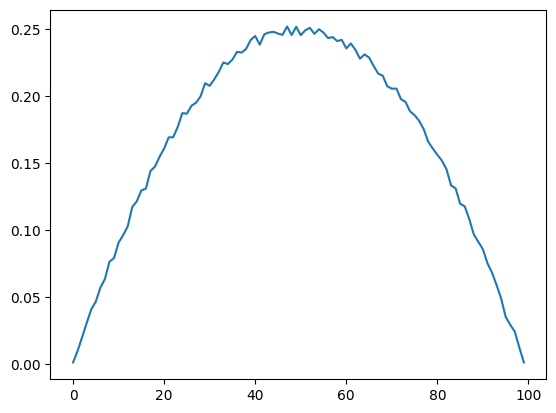

In [14]:
plt.plot(x)
plt.show()